<a href="https://colab.research.google.com/github/Vivek-afk81/data_mining/blob/main/Dimensionality_reduction_techiniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PRINCIPAL COMPONENT ANALYSIS

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE

In [3]:

# Change to a specific directory
os.chdir('/content/drive/My Drive/data_mining')

# Verify current directory
print(os.getcwd())

/content/drive/My Drive/data_mining


In [4]:
!ls

data  handwrittendigits  HandwrittenDigits.ipynb  Untitled0.ipynb


### Load and prepare the data

this is the data we saved in handwritten digits

In [10]:
 # Imports the training data
trn = pd.read_csv('data/optdigits_trn.csv')

# Separates the attributes PO-P63 into X_trn
X_trn = trn.filter (regex=r'\d')

# Separates the class variable into y_trn
y_trn = trn.y

# Imports the testing data
tst = pd.read_csv('data/optdigits_tst.csv')

# Separates the attributes PO-P63 into X_tst
X_tst = tst.filter(regex=r'\d')

# Separates the class variable into y_tst
y_tst = tst.y


###Principal component analysis: Train the model

In the training phase, we'll do the following:

1. Set up the PCA object
2. Project the training data onto the principal directions found by PCA
3. Plot the ratio of variances explained by each direction
4. Create a scatter plot of projected training data along the first two principal directions
5. Get the average log-likelihood score of all samples

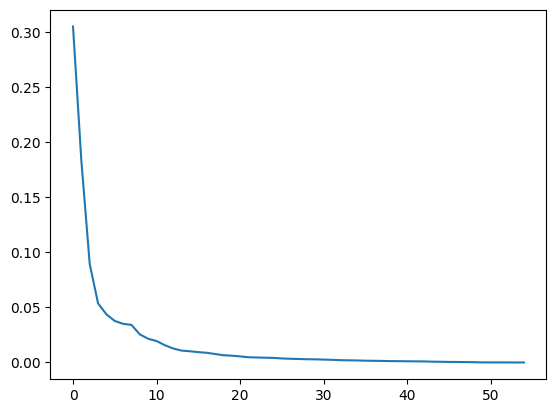

In [29]:
#sets an pca object
pca=PCA(n_components=55)
# Transform the data
trn_tf=pca.fit_transform(X_trn)

# Plot the variance explained by each component
plt.plot(pca.explained_variance_ratio_)

<Axes: >

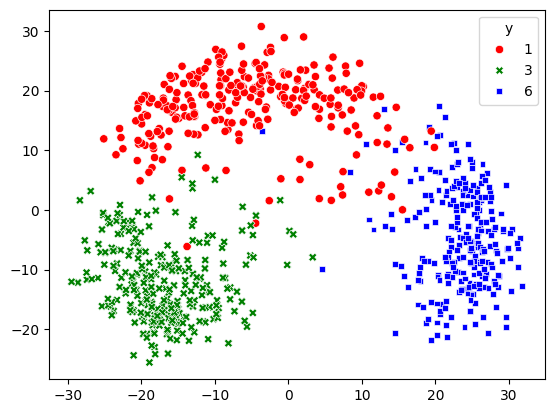

In [30]:
# Plots the projected data set on the first two principal components and colors by class

sns.scatterplot(
    x=trn_tf[:,0],
    y=trn_tf[:,1],
    style=y_trn,
    hue=y_trn,
    palette=['red','green','blue']
)

In [31]:
# Gets the average log likelihood score of training data  (with two decimal places)
#log likely hood lets us know how well are our PCA model reflects the original dataset

print("%.2f" % pca.score(X_tst))
#above line will give error for components>50  right now i dont know how to solve this so i re-initialized the pca with fewer components
#Error => LinAlgError: singular matrix

42.31


###Test the model

This phase takes the PCA model developed above and does the following:

1. Transforms the test data on the learned PCA directions
2. Creates a scatter plot along the first two principal directions
3. Finds the average log likelihood score of all test points

<Axes: >

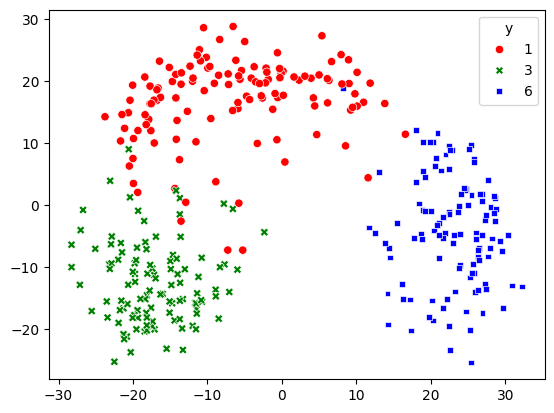

In [32]:
tst_tf=pca.transform(X_tst)

# make a scatter plot
sns.scatterplot(
    x=tst_tf[:,0],
    y=tst_tf[:,1],
    style=y_tst,
    hue=y_tst,
    palette=['red','green','blue']
)

In [33]:
# Calculate the log likelihood

print("%.2f" % pca.score(X_tst))

42.31


PCA likelihood measures how well data fits a Gaussian in a subspace — not how well it generalizes.

Few components  → low likelihood (negative)


Many components → high likelihood (can be positive)


#**LDA**: Linear Discriminant Analysis


In [34]:
 trn.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P55,P56,P57,P58,P59,P60,P61,P62,P63,y
0,0,0,0,16,6,0,0,0,0,0,...,0,0,0,0,10,13,0,0,0,1
1,0,0,4,16,14,0,0,0,0,0,...,0,0,0,6,16,16,16,4,0,1
2,0,0,12,10,0,0,0,0,0,3,...,3,0,0,9,16,16,16,16,9,1
3,0,0,0,6,16,3,0,0,0,0,...,0,0,0,1,8,12,15,13,1,6
4,0,0,11,12,7,0,0,0,0,0,...,0,0,0,8,10,8,0,0,0,1


### Linear Discriminanat Analysis : Train Model

1. Set up an LDA object as Ida using LinearDiscriminantAnalysis().
2. Fit the model to the training data trn .
3. Transform the data using lda .
4. Plot the transformed data.
5. Find the mean accuracy on the training data.

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()

#Fits the training data
lda.fit(X_trn,y_trn)

LinearDiscriminantAnalysis()

<Axes: >

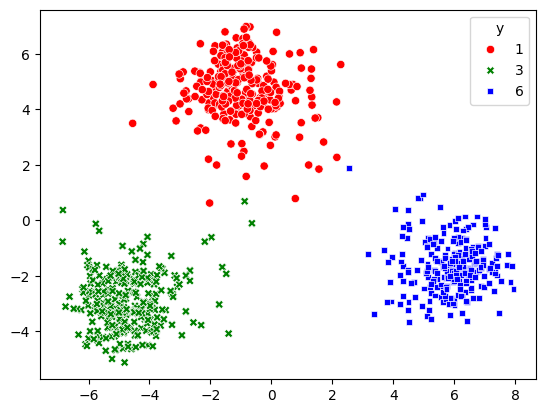

In [38]:
# Transforms training data
trn_tf=lda.transform(X_trn)

# plot the scatterplot
sns.scatterplot (
x=trn_tf[:, 0],
y=trn_tf[:, 1],
style=y_trn,
hue=y_trn,
palette=['red', 'green', 'blue'])

Get the accuracy of the model on the training data using score() and display as percentage with two decimal places.

In [40]:
print("Accuracy on training data= "+ str("{:.2%}".format(lda.score(X_trn,y_trn))))

Accuracy on training data= 99.63%


###Test Model

In this phase, we'll take the LDA model developed above and do the following:

1. Transform the test set using the trained model.
2. Plots the transformed data.
3. Find the prediction accuracy on the testing data.

<Axes: >

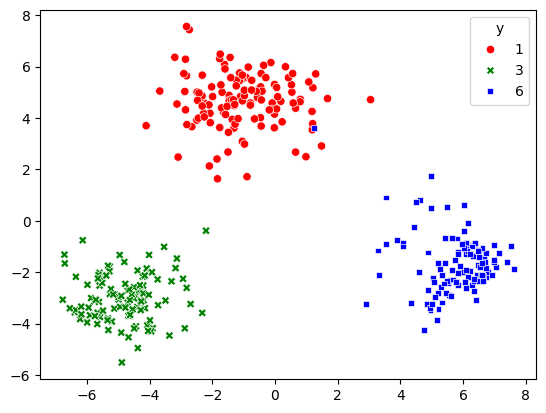

In [41]:
# Uses the trained model to transform the test data
tst_tf = lda.transform(X_tst)

# Plots the projected data set on the first two discriminant functions and colors by class
sns.scatterplot(
x=tst_tf[:, 0],
y=tst_tf[:, 1],
style=y_tst,
hue=y_tst,
palette=['red', 'green', 'blue' ])

In [42]:
print("Accuracy on training data= "+ str("{:.2%}".format(lda.score(X_tst,y_tst))))

Accuracy on training data= 99.71%


#**t-SNE**: t-Distributed Stochastic Neighbour Embedding



###Load and Prepare the data

Load the complete dataset (as opposed to the training or testing data) from the CSV file in the data directory. Separate the data matrix from the class variable.
Name the data matrix as df and the column with class labels as y .

In [44]:
df=pd.read_csv("data/optdigits.csv")

#separate theattributes
X=df.filter(regex=r"\d")

# Separate the class variable
y=df.y

In [46]:
df.head(),X,y

(   P0  P1  P2  P3  P4  P5  P6  P7  P8  P9  ...  P55  P56  P57  P58  P59  P60  \
 0   0   0   5  14   4   0   0   0   0   0  ...    0    0    0    4   12   14   
 1   0   0   0   3  16  11   1   0   0   0  ...    0    0    0    0    2   14   
 2   0   0   7  11  11   6   0   0   0   9  ...    0    0    0   14   16   12   
 3   0   0   9  13   1   0   0   0   0   0  ...    5    0    0    4   15   16   
 4   0   0   0  10  12   0   0   0   0   0  ...    0    0    0    1   11   14   
 
    P61  P62  P63  y  
 0    7    0    0  6  
 1   14    1    0  1  
 2   10    1    0  3  
 3   16   16   16  1  
 4   12    1    0  6  
 
 [5 rows x 65 columns],
       P0  P1  P2  P3  P4  P5  P6  P7  P8  P9  ...  P54  P55  P56  P57  P58  \
 0      0   0   5  14   4   0   0   0   0   0  ...   12    0    0    0    4   
 1      0   0   0   3  16  11   1   0   0   0  ...    0    0    0    0    0   
 2      0   0   7  11  11   6   0   0   0   9  ...   12    0    0    0   14   
 3      0   0   9  13   1   0   

###t-SNE: Model data

This phase applies t-SNE to the training data with various values of the perplexity parameter and displays embeddigs of data

In [48]:
from sklearn.manifold import TSNE
# Sets up the t-SNE object with two objects only
tsne=TSNE(
    n_components=2,
    random_state=1
)

In [49]:
# Display the t-SNE parameters
tsne.get_params()

{'angle': 0.5,
 'early_exaggeration': 12.0,
 'init': 'pca',
 'learning_rate': 'auto',
 'max_iter': None,
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'metric_params': None,
 'min_grad_norm': 1e-07,
 'n_components': 2,
 'n_iter': 'deprecated',
 'n_iter_without_progress': 300,
 'n_jobs': None,
 'perplexity': 30.0,
 'random_state': 1,
 'verbose': 0}

###PERPLEXITY=1

Perplexity ~ "How many neighbors should each point care about?"

* Low perplexity - focus on very local structure
* High perplexity - include more global structure

t-SNE:

1. Converts distances in high-D space into probabilities
2. Adjusts a Gaussian kernel for each point
3. Chooses the kernel width so that the entropy of that distribution equals the

chosen perplexity

Mathematically:

Perplexity = $2^{H(P)}$

where H(P) is the Shannon entropy of neighbor probabilities.

You don't need the math to use it-but this explains why it behaves like a neighbor
count.

<Axes: >

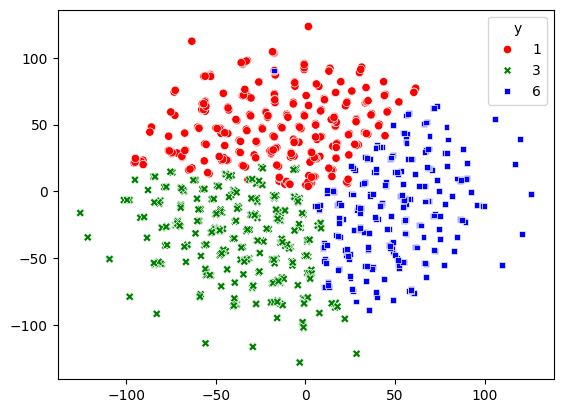

In [54]:
#set up the t-SNE with perplexity =1
tsne=TSNE(
    n_components=2,
    perplexity=1,
    random_state=1

)

#transform the attribute data
X_tf=tsne.fit_transform(X)

#Create a scatter plot of the dta embeddings
sns.scatterplot(
x=X_tf[:, 0],
y=X_tf[:, 1],
style=y,
hue=y,
palette=['red', 'green', 'blue' ])

###Perplexity =2

<Axes: >

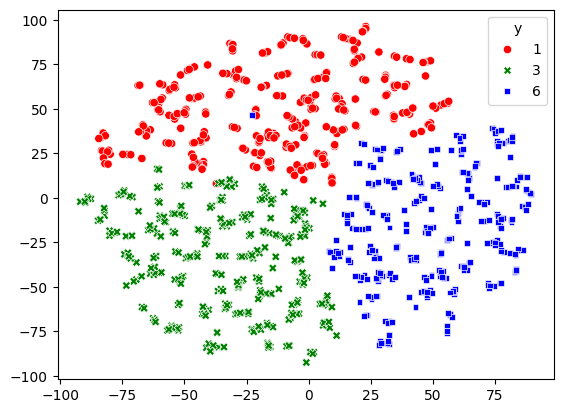

In [55]:
#set up the t-SNE with perplexity =1
tsne=TSNE(
    n_components=2,
    random_state=1,
    perplexity=2
)

#transform the attribute data
X_tf=tsne.fit_transform(X)

#Create a scatter plot of the dta embeddings
sns.scatterplot(
x=X_tf[:, 0],
y=X_tf[:, 1],
style=y,
hue=y,
palette=['red', 'green', 'blue' ])

###Perplexity=5

<Axes: >

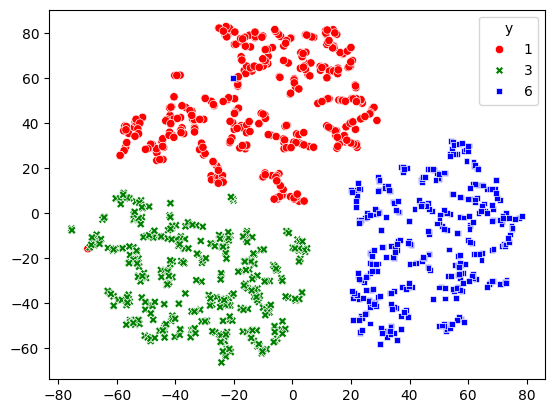

In [56]:
#set up the t-SNE with perplexity =1
tsne=TSNE(
    n_components=2,
    random_state=1,
    perplexity=5
)

#transform the attribute data
X_tf=tsne.fit_transform(X)

#Create a scatter plot of the dta embeddings
sns.scatterplot(
x=X_tf[:, 0],
y=X_tf[:, 1],
style=y,
hue=y,
palette=['red', 'green', 'blue' ])

###Perplexity=10

<Axes: >

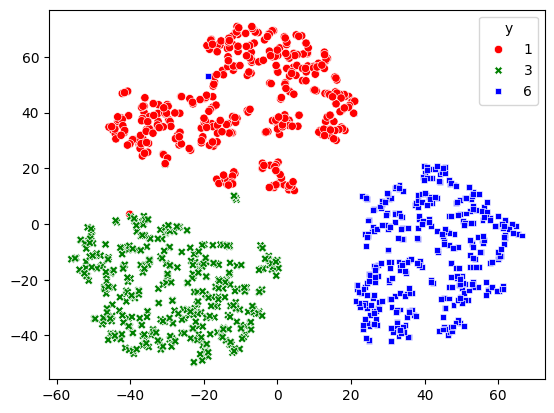

In [57]:
#set up the t-SNE with perplexity =1
tsne=TSNE(
    n_components=2,
    random_state=1,
    perplexity=10
)

#transform the attribute data
X_tf=tsne.fit_transform(X)

#Create a scatter plot of the dta embeddings
sns.scatterplot(
x=X_tf[:, 0],
y=X_tf[:, 1],
style=y,
hue=y,
palette=['red', 'green', 'blue' ])

###Perplexity=50

<Axes: >

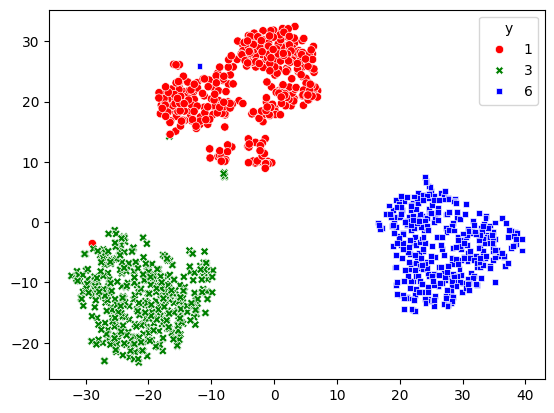

In [58]:
#set up the t-SNE with perplexity =1
tsne=TSNE(
    n_components=2,
    random_state=1,
    perplexity=50
)

#transform the attribute data
X_tf=tsne.fit_transform(X)

#Create a scatter plot of the dta embeddings
sns.scatterplot(
x=X_tf[:, 0],
y=X_tf[:, 1],
style=y,
hue=y,
palette=['red', 'green', 'blue' ])